<a href="https://colab.research.google.com/github/mohith-ds8/Health-Insurance-Cross-Sell-Prediction/blob/main/Health_Insurance_Cross_Sell_Prediciotn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ✅**Project Name**    - Health Insurance Cross Sell Prediciotn



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name** - Mohith DS
##### **Cohort -** Enlighten

# **Project Summary -**

Write the summary here within 500-600 words.

# ✅**GitHub Link -**

https://github.com/mohith-ds8/Health-Insurance-Cross-Sell-Prediction/tree/main

# ✅**Problem Statement**


Our client is an Insurance company that has provided Health Insurance to its customers, now they need our help in **building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company**.

In order to predict whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# ✅**General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ✅***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f

# Importing libraries for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

### Dataset Loading

In [ ]:
# Loading Dataset to variable 'df'
df = pd.read_csv('/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(381109, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
# Printing the number of duplicated rows

print(len(df[df.duplicated()]))

0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Checking the sum of null values for each column

df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### What did you know about your dataset?



*   We have the dataset of health insurance customers and also the information regarding their vehicle. 
*   The target variable is 'Response'. 
*   The dataset has 3,81,109 entries and 14 columns. Out of the 14 columns, 3 are of **'object'** datatype and rest are of **'numeric'** datatype.
*   There are no missing values/duplicate values in the dataset.




## ✅***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description 




1. *id*: Unique row id
2. *gender*: Gender of the customer
3. *Age*: Age of the customer
4. *Driving_Licence*: Whether the customer holds a DL or not
5. *Region_Code*: Unique code fot the region of the cusotmer
6. *Previously_Insured*: Whether the customer previously had an insurance or not
7. *Vehicle_Age*: Age of the vehicle
8. *Vehicle_Damage*: Whether the vehicle had past damages or not.
9. *Annual_Premium*: The annual premium customer ahs to pay.
10. *Policy_Sales_Channel*: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
11. *Vintage*: Number of Days, Customer has been associated with the company
12. *Response*: Customer is interested or not

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [ ]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

## ✅***3. Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Copying the dataset for backup
df_copy = df.copy()

# We can drop the 'id' column as it is not much of use for us
df.drop(['id'],axis=1, inplace=True)

##### The categorical columns (Driving_License & Previously_Insured) has values 1 & 0. We need to convert it into Yes and No.

In [ ]:
# Converting 'Driving_License' & 'Previously_Insured' from 1,0 to Yes and No.

df['Driving_License'] = df['Driving_License'].apply(lambda x: 'Yes' if x==1 else "No")
df['Previously_Insured']=df['Previously_Insured'].apply(lambda x: 'Yes' if x==1 else "No")

In [ ]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,Yes,28,No,> 2 Years,Yes,40454,26,217,1
1,Male,76,Yes,3,No,1-2 Year,No,33536,26,183,0
2,Male,47,Yes,28,No,> 2 Years,Yes,38294,26,27,1
3,Male,21,Yes,11,Yes,< 1 Year,No,28619,152,203,0
4,Female,29,Yes,41,Yes,< 1 Year,No,27496,152,39,0


In [ ]:
# Coverting 'Region_Code'	, 'Annual_Premium' &	'Policy_Sales_Channel' from float to int datatype to save space.

df['Region_Code']=df.Region_Code.astype(int)
df['Annual_Premium']=df.Annual_Premium.astype(int)
df['Policy_Sales_Channel']=df.Policy_Sales_Channel.astype(int)

In [ ]:
# Divide Data in categorical and numerical features

numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [ ]:
# Checking out some numerical features
numeric_features.head()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,44,28,40454,26,217,1
1,76,3,33536,26,183,0
2,47,28,38294,26,27,1
3,21,11,28619,152,203,0
4,29,41,27496,152,39,0


In [ ]:
# Checking out some numerical features
categorical_features.head()

,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage
0,Male,Yes,No,> 2 Years,Yes
1,Male,Yes,No,1-2 Year,No
2,Male,Yes,No,> 2 Years,Yes
3,Male,Yes,Yes,< 1 Year,No
4,Female,Yes,Yes,< 1 Year,No


### What all manipulations have you done and insights you found?


*   First we create a backup dataset under the name, 'df_copy'.
*   We drop the 'id' column as it is not much of use for us.
*   We convert the values in categorical columns 'Driving_License' & 'Previously_Insured' from 1 & 0 to Yes and No for better visualization.
*   We covert 'Region_Code'	, 'Annual_Premium' &	'Policy_Sales_Channel' columns from float to int datatype to save space.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})

In [ ]:
sns.set_style(style='white')

### Univariate analysis

#### Chart - 1: Dependant variable - Response (Countplot)

<Axes: xlabel='Response', ylabel='count'>

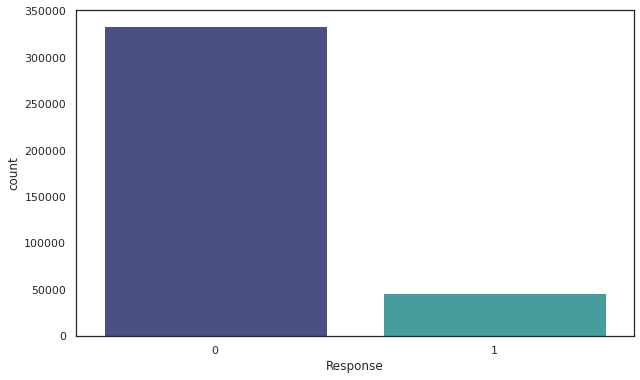

In [ ]:
# Chart - 1 visualization code 
# Plotting a countplot for categorical variable- 'Response'

sns.countplot(x=df['Response'], data=df, palette='mako')

##### 1. Why did you pick the specific chart?

Countplot is one of the best way to visualize the value count distribution of a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Out of the total respondants i.e **3,81,109 people, only 12.25%** of (46,710) people were **interested** in buying the vehicle insurance from our company.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight sheds the light on the **cross selling conversion rate** of the company which is close to 12%. The company can improve the conversion rate by taking steps to encourage people to buy vehicle insurance by offering some **incentives/ease of application & claim settlement process.** Cross selling might be an effective way to increase the profits since the **customer acquisition cost still remains 0.**

#### Chart - 2: Previously_Insured (Countplot)

<Axes: xlabel='Previously_Insured', ylabel='count'>

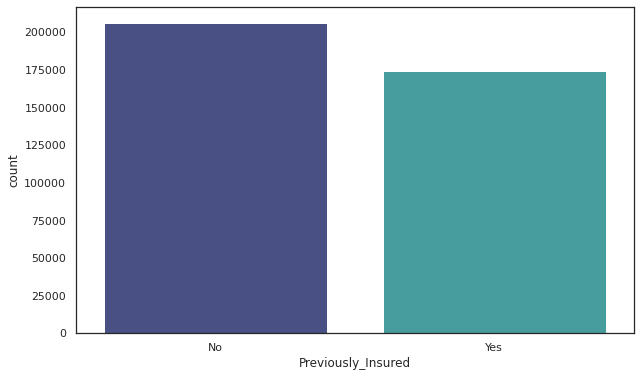

In [ ]:
# Chart - 2 visualization code
# Plotting a countplot for categorical variable- 'Previously_Insured'

sns.countplot(x=df['Previously_Insured'], data=df, palette='mako')

##### 1. Why did you pick the specific chart?

Countplot is one of the best way to visualize the value count distribution of a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

<Axes: xlabel='Vehicle_Age', ylabel='count'>

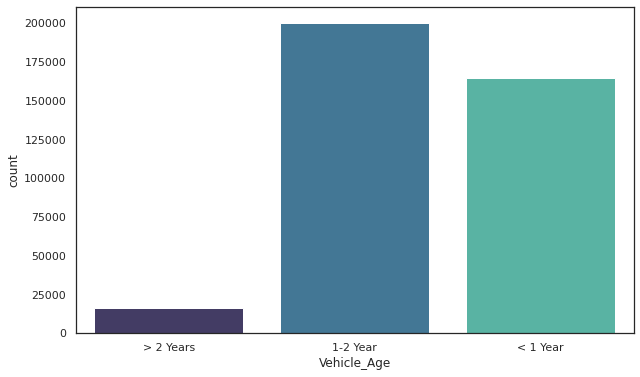

In [ ]:
# Chart - 3 visualization code
sns.countplot(x=df['Vehicle_Age'], data=df, palette='mako')

##### 1. Why did you pick the specific chart?

Countplot is one of the best way to visualize the value count distribution of a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

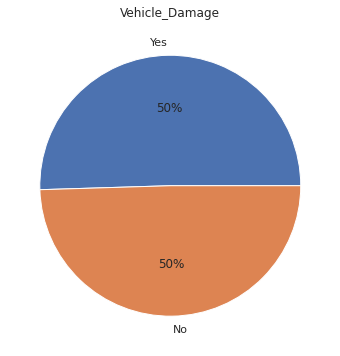

In [ ]:
# Chart - 4 visualization code
plt.pie(df['Vehicle_Damage'].value_counts(),labels = df['Vehicle_Damage'].value_counts().keys().tolist(),autopct='%.0f%%')
plt.title('Vehicle_Damage')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are one of the best ways for univariate analysis of categorical data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

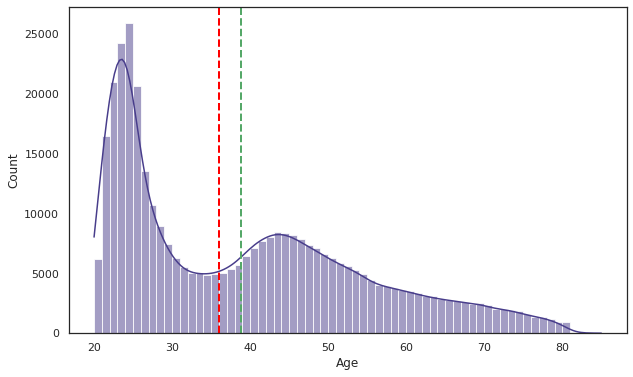

In [ ]:
# Chart - 5 visualization code
# Plotting histplot for 'Age' column and visualzing mean (green line) and median (red line)

sns.histplot(df['Age'],kde=True,color='darkslateblue',bins=np.arange(df['Age'].min(), df['Age'].max() + 1))
plt.axvline(df['Age'].mean(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df['Age'].median(), color='red', linestyle='dashed', linewidth=2)

##### 1. Why did you pick the specific chart?

Histogram along with the KDE line lets us visualize the density & the distribution of the feature. The mean & medain dashed lines also gives us the level of skewness.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

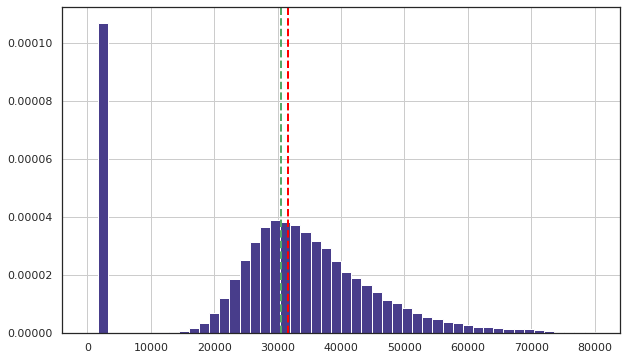

In [ ]:
# Chart - 6 visualization code
# Plotting histplot for 'Annual_Premium' column and visualzing mean (green line) and median (red line)

df['Annual_Premium'].hist(bins = 50, density = True, range=[0, 80000],color='darkslateblue')
plt.axvline(df['Annual_Premium'].mean(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df['Annual_Premium'].median(), color='red', linestyle='dashed', linewidth=2)

##### 1. Why did you pick the specific chart?

Histogram along with the KDE line lets us visualize the density & the distribution of the feature. The mean & medain dashed lines also gives us the level of skewness.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

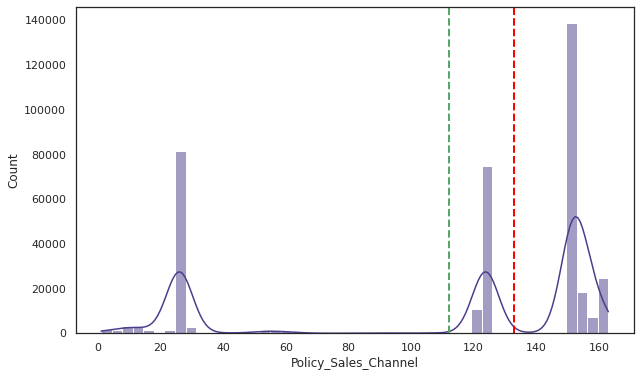

In [ ]:
# Chart - 7 visualization code
# Plotting histplot for 'Policy_Sales_Channel' column and visualzing mean (green line) and median (red line)

sns.histplot(x=df['Policy_Sales_Channel'],kde=True,color='darkslateblue')
plt.axvline(df['Policy_Sales_Channel'].mean(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df['Policy_Sales_Channel'].median(), color='red', linestyle='dashed', linewidth=2)

##### 1. Why did you pick the specific chart?

Histogram along with the KDE line lets us visualize the density & the distribution of the feature. The mean & medain dashed lines also gives us the level of skewness.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

<Axes: >

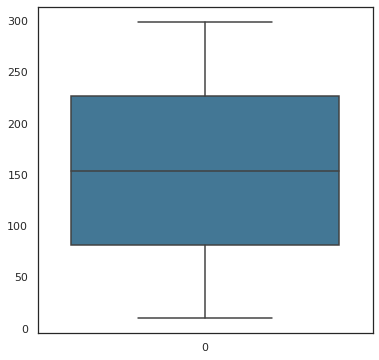

In [ ]:
# Chart - 8 visualization code
# Plotting a boxplot for 'Vintage' column 

plt.figure(figsize=(6,6))
sns.boxplot(df['Vintage'],palette='mako')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### Bivariate Analysis

#### Chart - 9

<Axes: xlabel='Gender', ylabel='count'>

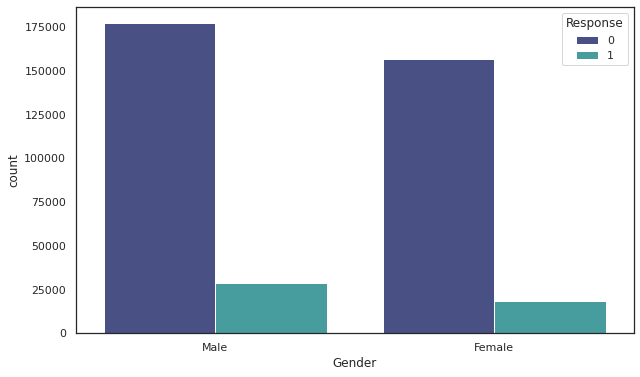

In [ ]:
# Chart - 9 visualization code
# 

sns.countplot(x='Gender',hue='Response',palette="mako", data=df)

##### 1. Why did you pick the specific chart?

Countplot is one of the best way to visualize the relationship of a categorical variable wrt another categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

<Axes: xlabel='Previously_Insured', ylabel='count'>

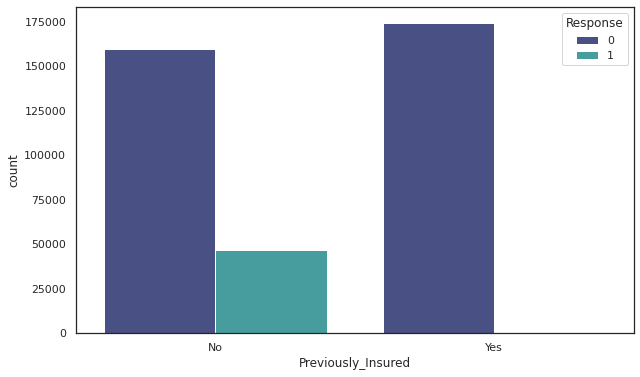

In [ ]:
# Chart - 10 visualization code
# 

sns.countplot(x='Previously_Insured',hue='Response',palette="mako", data=df)

##### 1. Why did you pick the specific chart?

Countplot is one of the best way to visualize the relationship of a categorical variable wrt another categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

<Axes: xlabel='Vehicle_Age', ylabel='count'>

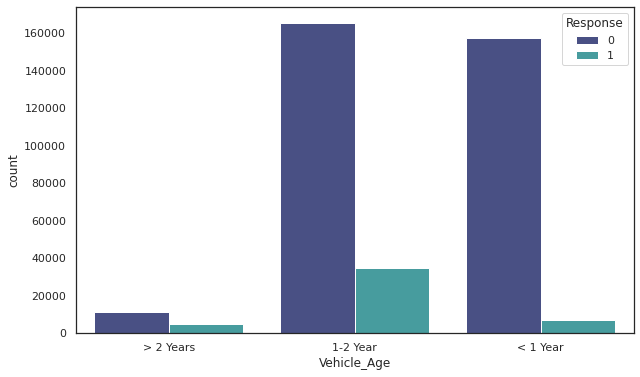

In [ ]:
# Chart - 11 visualization code
# 

sns.countplot(x='Vehicle_Age',hue='Response',palette="mako", data=df)

##### 1. Why did you pick the specific chart?

Countplot is one of the best way to visualize the relationship of a categorical variable wrt another categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

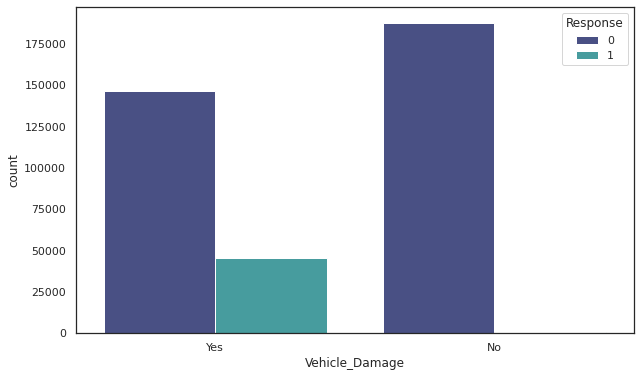

In [ ]:
# Chart - 12 visualization code
# 

sns.countplot(x='Vehicle_Damage',hue='Response',palette="mako", data=df)

##### 1. Why did you pick the specific chart?

Countplot is one of the best way to visualize the relationship of a categorical variable wrt another categorical variable.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

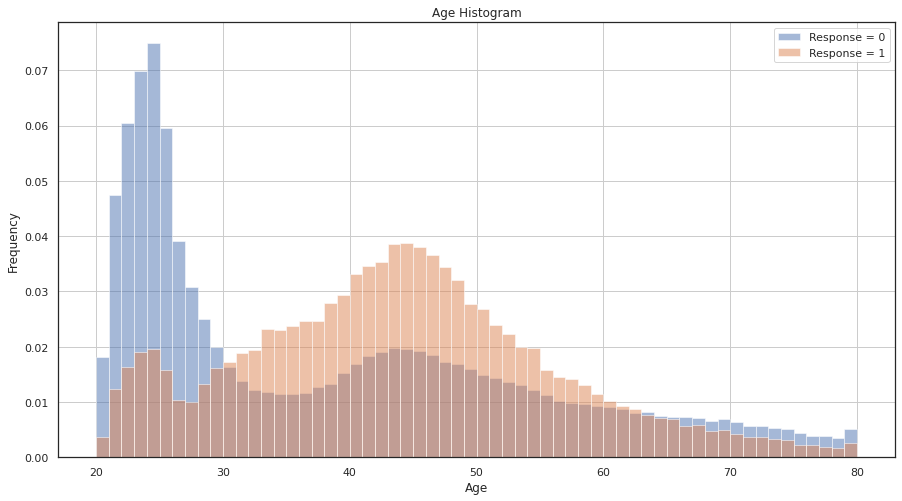

In [ ]:
# Chart - 13 visualization code
# 

df.groupby('Response').Age.hist(range=[20, 80], align = 'mid', bins=60, figsize=(15,8), density = True, alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')
plt.legend(['Response = 0', 'Response = 1'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14

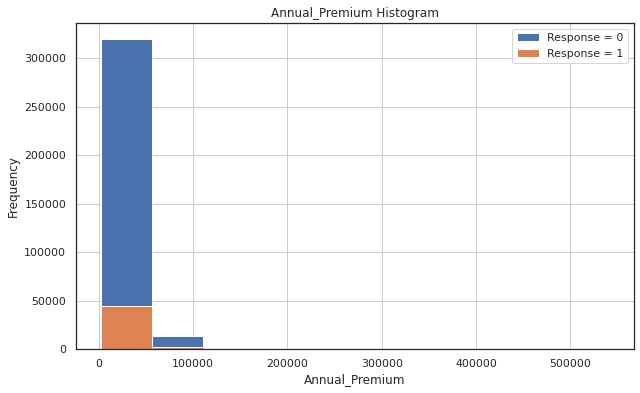

In [ ]:
# Chart - 13 visualization code
# 

df.groupby('Response').Annual_Premium.hist()
plt.xlabel('Annual_Premium')
plt.ylabel('Frequency')
plt.title('Annual_Premium Histogram')
plt.legend(['Response = 0', 'Response = 1'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

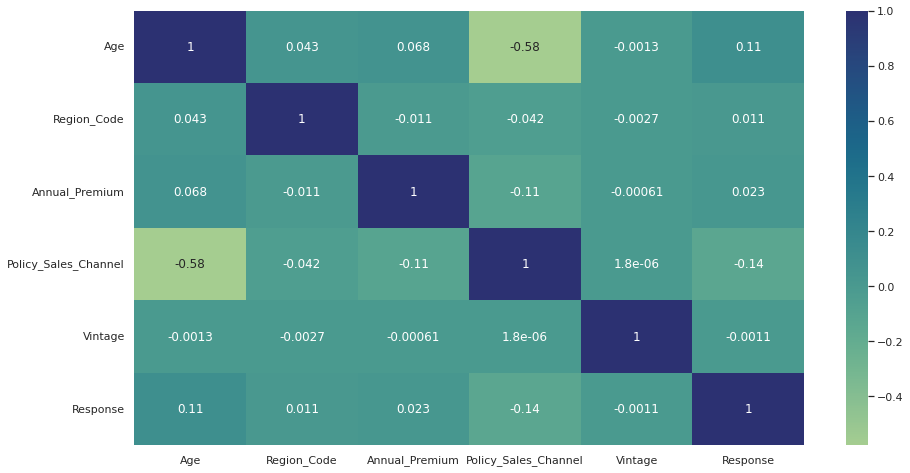

In [ ]:
# Correlation Heatmap visualization code

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="crest")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

<Figure size 1080x576 with 0 Axes>

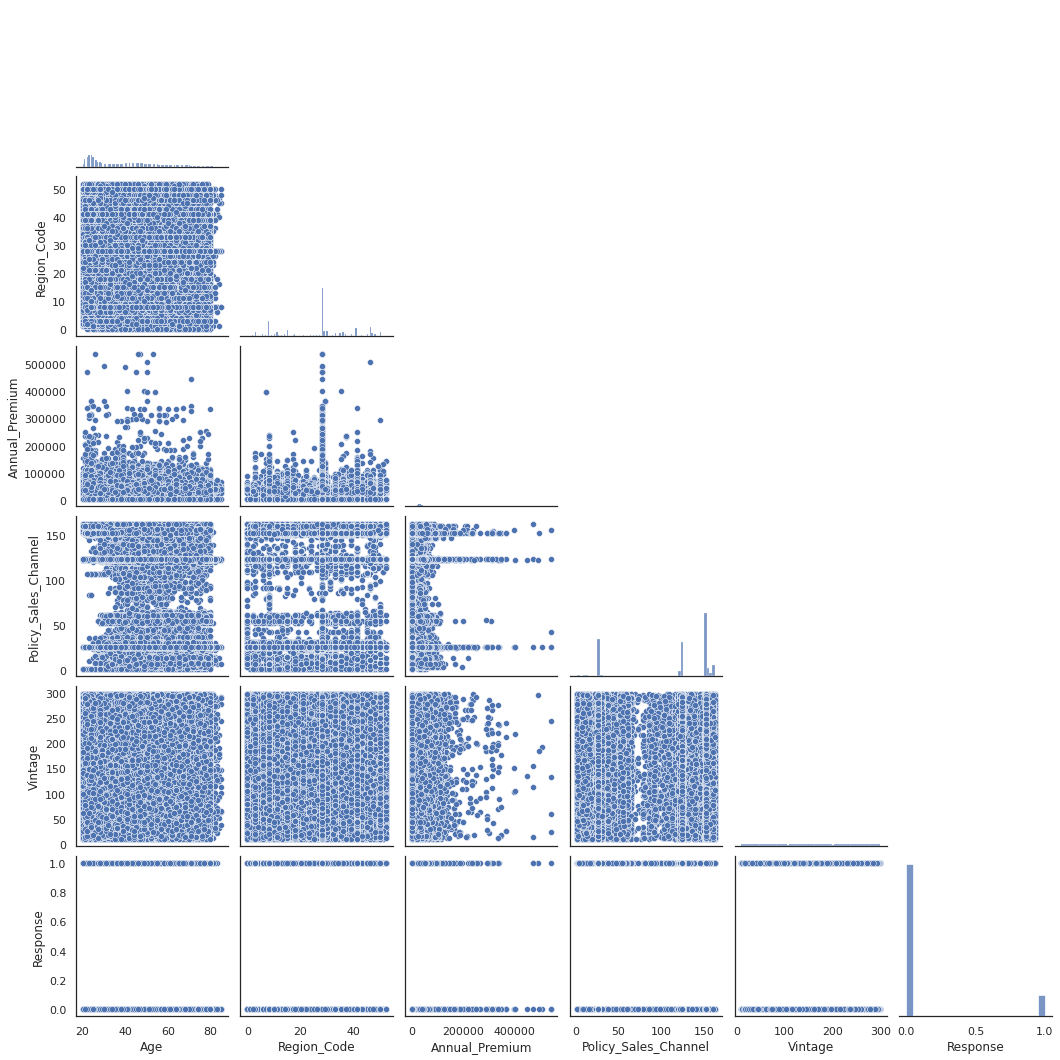

In [ ]:
# Pair Plot visualization code
plt.figure(figsize=(15,8))
sns.pairplot(df, corner=True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

There are no missing values.

### 2. Handling Outliers

only premium

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

only age

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

covert to int, drop DL column

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

minmax

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

smote

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***